In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from nltk.classify import ClassifierI
from statistics import mode
import matplotlib.pyplot as plt
import nltk

In [2]:
class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return votes

    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf


In [3]:
def extract(word_list):
    all_word_types=['J','V','N']
    ret_list=[]
    temp=nltk.pos_tag(word_list)
    for w in temp:
        if (w[1][0]) in all_word_types:
            ret_list.append(w[0].lower())
        
    return ret_list

def find_feats(document):
    words=nltk.word_tokenize(document)
    words=extract(words)
    features={}
    for w in word_feats:
         features[w]=w in words
    return features

def find_pred(clf,test_set):
    y_pred=[clf.classify(test_set[i][0]) for i in range(len(test_set))]
    y_true=[test_set[i][1] for i in range(len(test_set))]
    y_pred=pd.Series(y_pred).apply(lambda x:0 if x=='neg' else 1)
    y_true=pd.Series(y_true).apply(lambda x:0 if x=='neg' else 1)
    accuracy=accuracy_score(y_true,y_pred)*100
    f_beta=fbeta_score(y_true,y_pred,beta=0.5)
    return accuracy,f_beta

In [4]:
temp_var=open('word_feats.pickle','rb')
word_feats=pickle.load(temp_var)
temp_var.close()

temp_var=open('train_data.pickle','rb')
train_set=pickle.load(temp_var)
temp_var.close()


temp_var=open('test_data.pickle','rb')
test_set=pickle.load(temp_var)
temp_var.close()

save_clf=open('OrigNB.pickle','rb')
Classifier=pickle.load(save_clf)
save_clf.close()

save_clf=open('Logistic_reg.pickle','rb')
LogisticRegression_classifier=pickle.load(save_clf)
save_clf.close()

save_clf=open('LinearSVC.pickle','rb')
linsvc_bestclf=pickle.load(save_clf)
save_clf.close()

save_clf=open('NuSVC.pickle','rb')
NuSVC_bestclf=pickle.load(save_clf)
save_clf.close()

save_clf=open('randomforest.pickle','rb')
rf_bestclf=pickle.load(save_clf)
save_clf.close()

save_clf=open('unopt_LinearSVC.pickle','rb')
unopt_linSVC_classifier=pickle.load(save_clf)
save_clf.close()

save_clf=open('unopt_NuSVC.pickle','rb')
unopt_NuSVC_classifier=pickle.load(save_clf)
save_clf.close()

save_clf=open('unopt_randomforest.pickle','rb')
unopt_rf_classifier=pickle.load(save_clf)
save_clf.close()

In [5]:
def find_pred(clf,test_set):
    y_pred=[clf.classify(test_set[i][0]) for i in range(len(test_set))]
    y_true=[test_set[i][1] for i in range(len(test_set))]
    y_pred=pd.Series(y_pred).apply(lambda x:0 if x=='neg' else 1)
    y_true=pd.Series(y_true).apply(lambda x:0 if x=='neg' else 1)
    accuracy=accuracy_score(y_true,y_pred)*100
    f_beta=fbeta_score(y_true,y_pred,beta=0.5)
    return accuracy,f_beta

In [6]:
df_output_raw=pd.Series([list(train_set[i])[-1] for i in range(len(train_set))])
# Encode output into numerical values

df_output=df_output_raw.apply(lambda x: 1 if x =='pos' else 0)

#### Bench mark model #####
accuracies=[]
fbeta=[]
TP=np.sum(df_output)
FP=df_output.count()-TP
naive_acc=TP/(TP+FP)
beta=0.5
recall = TP/TP
precision = naive_acc
naive_fscore = (1+beta**2)*precision*recall/((beta**2*precision)+recall)
print('Benchmark model Naive accuracy:{} and naive beta score:{}'.format(naive_acc*100,naive_fscore))
accuracies.append(naive_acc*100)
fbeta.append(naive_fscore)

Benchmark model Naive accuracy:49.91 and naive beta score:0.5546664888533261


In [7]:

acc,beta=find_pred(Classifier,test_set)
accuracies.append(acc)
fbeta.append(beta)
print('Original Naive Bayes accuracy:{} and f_beta:{}'.format(acc,beta))

acc,beta=find_pred(LogisticRegression_classifier,test_set)
accuracies.append(acc)
fbeta.append(beta)
print('Logistic Regression accuracy:{} and f_beta:{}'.format(acc,beta))

acc,beta=find_pred(linsvc_bestclf,test_set)
accuracies.append(acc)
fbeta.append(beta)
print('Linear SVC accuracy:{} and f_beta:{}'.format(acc,beta))

acc,beta=find_pred(unopt_linSVC_classifier,test_set)
accuracies.append(acc)
fbeta.append(beta)
print('unoptimised Linear SVC accuracy:{} and f_beta:{}'.format(acc,beta))

acc,beta=find_pred(NuSVC_bestclf,test_set)
accuracies.append(acc)
fbeta.append(beta)
print('Nu SVC accuracy:{} and f_beta:{}'.format(acc,beta))

acc,beta=find_pred(unopt_NuSVC_classifier,test_set)
accuracies.append(acc)
fbeta.append(beta)
print('unoptimised Nu SVC accuracy:{} and f_beta:{}'.format(acc,beta))

acc,beta=find_pred(rf_bestclf,test_set)
accuracies.append(acc)
fbeta.append(beta)
print('Random Forest accuracy:{} and f_beta:{}'.format(acc,beta))

acc,beta=find_pred(unopt_rf_classifier,test_set)
accuracies.append(acc)
fbeta.append(beta)
print('unoptimised Random Forest accuracy:{} and f_beta:{}'.format(acc,beta))




Original Naive Bayes accuracy:66.71686746987952 and f_beta:0.669943093636834
Logistic Regression accuracy:66.26506024096386 and f_beta:0.6750788643533122
Linear SVC accuracy:64.7590361445783 and f_beta:0.6530717604543108
unoptimised Linear SVC accuracy:63.704819277108435 and f_beta:0.6441558441558441
Nu SVC accuracy:66.41566265060241 and f_beta:0.6663301362948006
unoptimised Nu SVC accuracy:59.48795180722891 and f_beta:0.6094117647058824
Random Forest accuracy:62.65060240963856 and f_beta:0.6346826586706646
unoptimised Random Forest accuracy:60.69277108433735 and f_beta:0.6183206106870229


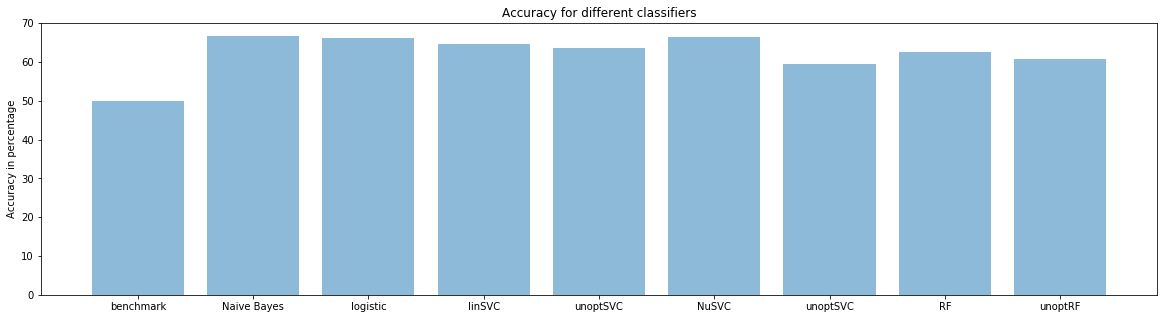

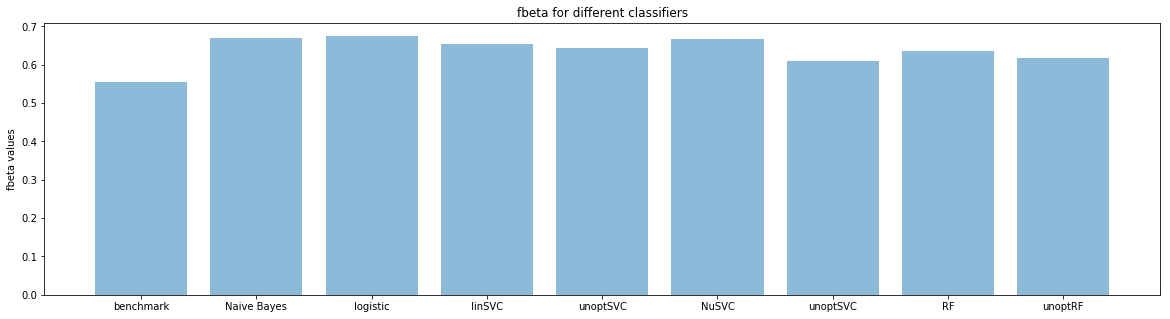

In [8]:
%matplotlib inline
objects=('benchmark','Naive Bayes','logistic','linSVC', 'unoptSVC','NuSVC','unoptSVC','RF','unoptRF')
y_pos = np.arange(len(objects))
plt.figure(1)
plt.figure(figsize=(20,5))
plt.bar(y_pos, accuracies, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy in percentage')
plt.title('Accuracy for different classifiers')
plt.figure(2)
plt.figure(figsize=(20,5))
plt.bar(y_pos, fbeta, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('fbeta values')
plt.title('fbeta for different classifiers')
plt.show()


In [9]:
voted_classifier = VoteClassifier(Classifier,
                                  LogisticRegression_classifier,
                                  linsvc_bestclf,
                                  NuSVC_bestclf,
                                  rf_bestclf)

In [10]:
def sentiment(text,ground_truth_flag=False):
    
    if ground_truth_flag==True:
        feats=text[0]
        return voted_classifier.classify(feats),voted_classifier.confidence(feats)
    else: 
        feats = find_feats(text)
        return voted_classifier.classify(feats),voted_classifier.confidence(feats)
        
    

In [11]:
votes=[]
confidences=[]
for i in range(len(test_set)):
    vote,confidence=sentiment(test_set[i],ground_truth_flag=True)
    votes.append(vote)
    confidences.append(confidence*100)

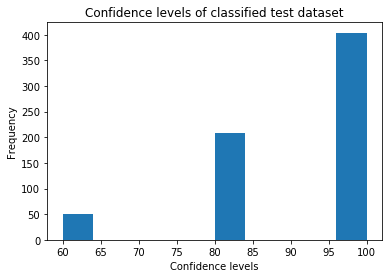

In [14]:
%matplotlib inline
plt.hist(confidences)
plt.xlabel('Confidence levels')
plt.ylabel('Frequency')
plt.title('Confidence levels of classified test dataset')
plt.show()


In [13]:
statement1="This movie was awesome! The acting was great, plot was wonderful, and there were pythons...so yea!"
statement2="This movie was utter junk. There were absolutely 0 pythons. I don't see what the point was at all. Horrible movie, 0/10"
statement3='He is the best fighter I have seen since a long time, however, he is a total idiot!'